In [27]:
import pandas as pd
import numpy as np

import geopandas
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [28]:


gdf = geopandas.read_file("C:/Users/abben/Desktop/S3/Stata-python Logiciel stat/biha/geopandas/shape/mrt_admbnda_adm1_gov_20200801.shp") 
poverty= pd.read_csv('C:/Users/abben/Desktop/S3/Stata-python Logiciel stat/biha/mrt/dataset.csv', sep= ";")

In [29]:
poverty.head()


,moughataa,willaya,p0,p1_,p2_,c0_,c1_,c2_
0,Aioun,Hodh el Gharbi,41.5,11.4,4.5,3.6,2.9,2.4
1,Akjoujt,Inchiri,19.6,5.8,2.0,0.2,0.1,0.1
2,Aleg,Brakna,48.5,20.4,11.6,4.9,6.1,7.3
3,Amourj,Hodh ech Chargui,59.1,22.6,11.4,3.8,4.3,4.5
4,Aoujeft,Adrar,59.1,22.6,11.4,3.8,4.3,4.5


In [30]:
poverty.shape

(44, 8)

In [31]:
wilaya = poverty[["willaya","p0","p1_","p2_"]]
wilaya["wilaya_index"] =  wilaya.mean(axis=1)
wilaya.head(10)

,willaya,p0,p1_,p2_,wilaya_index
0,Hodh el Gharbi,41.5,11.4,4.5,19.133333
1,Inchiri,19.6,5.8,2.0,9.133333
2,Brakna,48.5,20.4,11.6,26.833333
3,Hodh ech Chargui,59.1,22.6,11.4,31.033333
4,Adrar,59.1,22.6,11.4,31.033333
5,Adrar,55.5,20.9,9.5,28.633333
6,Brakna,57.6,20.3,9.9,29.266667
7,Assaba,67.3,31.0,17.3,38.533333
8,Hodh ech Chargui,53.0,23.5,12.9,29.800000
9,Tiris Zemmour,49.3,16.7,7.6,24.533333


In [32]:
import geopandas
wilaya = wilaya.groupby("willaya" ,as_index=False).mean()
wilayas_map = {"Hodh ech Chargui":"MR07","Hodh el Gharbi":"MR08","Assaba":"MR02","Gorgol":"MR05","Brakna":"MR03","Trarza":"MR12","Adrar":"MR01","Dakhlet Nouadhibou":"MR04","Tagant":"MR11","Guidimaka":"MR06","Tiris Zemmour":"MR13","Inchiri":"MR09","Nouakchott":"MR10"}
wilaya['ADM1_PCODE'] =  wilaya.willaya.map(wilayas_map)


In [33]:
newpoverty= gdf.merge(wilaya, on='ADM1_PCODE')

In [34]:
type(newpoverty)

geopandas.geodataframe.GeoDataFrame

In [35]:
newpoverty.head()

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,willaya,p0,p1_,p2_,wilaya_index
0,22.867363,19.400058,Adrar,MR01,None,None,None,Mauritania,MR,2020-06-12,2020-07-31,None,"POLYGON ((-6.34220 22.87040, -7.33110 20.90600...",Adrar,58.166667,21.70,10.533333,30.133333
1,12.534079,3.047498,Assaba,MR02,None,None,None,Mauritania,MR,2020-06-12,2020-07-31,None,"POLYGON ((-10.96840 18.27900, -10.99870 18.129...",Assaba,48.560000,16.84,7.960000,24.453333
2,8.626122,2.828724,Brakna,MR03,None,None,None,Mauritania,MR,2020-06-12,2020-07-31,None,"POLYGON ((-12.90530 16.68420, -12.92920 16.635...",Brakna,54.980000,20.00,9.760000,28.246667
3,13.117717,3.244490,Dakhlet-Nouadhibou,MR04,None,None,None,Mauritania,MR,2020-06-12,2020-07-31,None,"POLYGON ((-13.66770 21.33340, -13.67303 21.244...",Dakhlet Nouadhibou,12.400000,2.50,0.600000,5.166667
4,6.545777,1.155114,Gorgol,MR05,None,None,None,Mauritania,MR,2020-06-12,2020-07-31,None,"POLYGON ((-12.77000 16.48380, -12.76750 16.460...",Gorgol,59.875000,21.55,10.475000,30.633333


<AxesSubplot:>

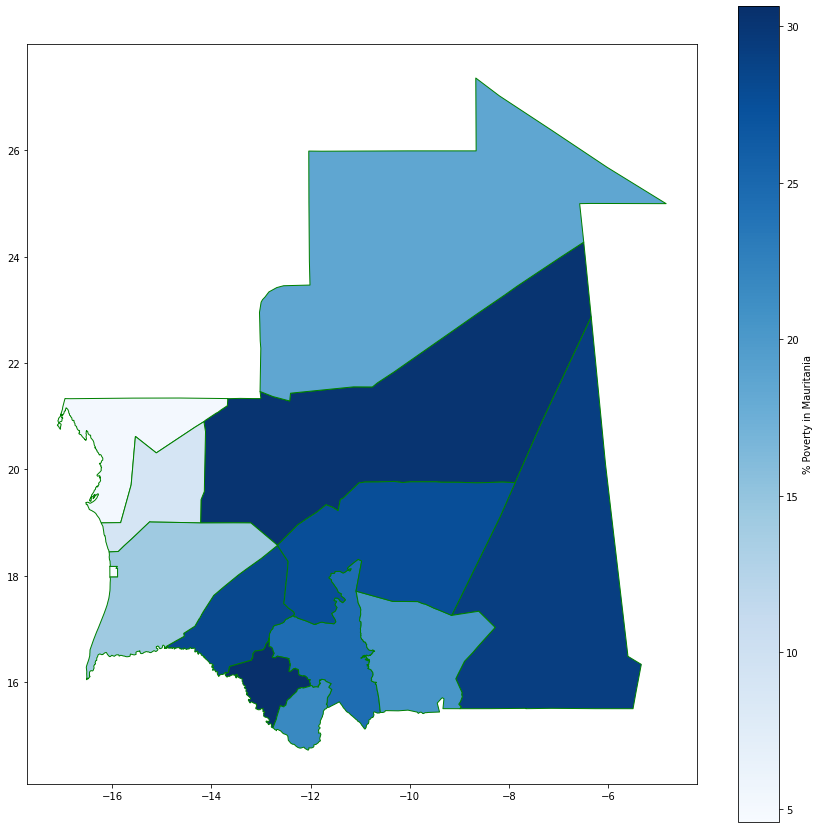

In [36]:

newpoverty.plot("wilaya_index", figsize=(15,15), edgecolor="green", cmap=plt.cm.Blues,legend=True, legend_kwds={"label":"% Poverty in Mauritania"})

In [38]:
from bokeh.plotting import figure, show, output_file
from bokeh.tile_providers import CARTODBPOSITRON
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool
wi_geojson=GeoJSONDataSource(geojson=newpoverty.to_json())
from bokeh.palettes import brewer
color_mapper = LinearColorMapper(palette = brewer['RdBu'][10], low = 0, high = 20)
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
                     border_line_color=None,location = (0,0))

In [44]:
p = figure(title="wilaya_index")
p.patches("xs","ys",source=wi_geojson,color='green',
          fill_color = {'field' :'per_success', 'transform' : color_mapper})
p.add_layout(color_bar, 'below')
newpoverty.explore()

























#line

